## Activity monitor optimization

In [1]:
# Connect to drive

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Move the directory to the csv files
# %cd /content/drive/MyDrive/Capstone/Activity_Monitor/

## Data pre processing - Activity monitor

In [66]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

In [5]:
## Read csv data
df = pd.read_csv('mhealth_raw_data.csv')

## Important information form the data

ACTIVITY SET

The activity set is listed in the following:

L1: Standing still (1 min)

L2: Sitting and relaxing (1 min)

L3: Lying down (1 min)

L4: Walking (1 min)

L5: Climbing stairs (1 min)

L6: Waist bends forward (20x)

L7: Frontal elevation of arms (20x)

L8: Knees bending (crouching) (20x)

L9: Cycling (1 min)

L10: Jogging (1 min)

L11: Running (1 min)

L12: Jump front & back (20x)

NOTE: In brackets are the number of repetitions (Nx) or the duration of the exercises (min).

In [6]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [7]:
df.shape

(1215745, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


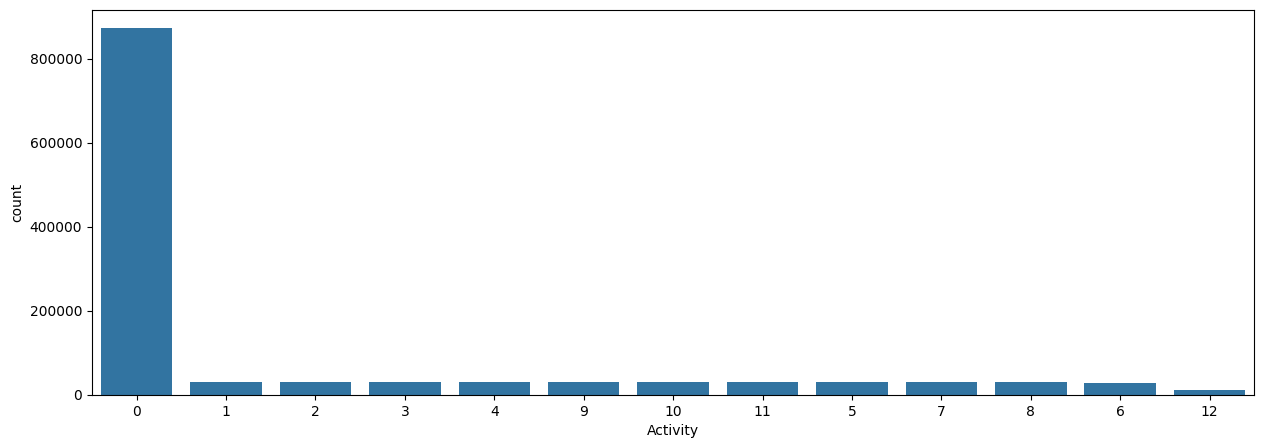

In [9]:
plt.figure(figsize=(15, 5))
sns.countplot(x =df['Activity'],data = df,order=df["Activity"].value_counts().index )
plt.show()

In [10]:
df = df.drop('subject', axis=1)

In [11]:
df['Activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

## Activities

0: 'Nothing'

1: 'Standing still'

2: 'Sitting and relaxing'

3: 'Lying down'

4: 'Walking'

5: 'Climbing stairs'

6: 'Waist bends forward'

7: 'Frontal elevation of arms'

8: 'Knees bending (crouching)'

9: 'Cycling'

10: 'Jogging'

11: 'Running'

12: 'Jump front & back'

## Using only few of the acitvities for our project

0: 'Walking'

1: 'Climbing stairs'

2: 'Cycling'

3: 'Running'

In [12]:
pd.options.mode.copy_on_write = True

In [13]:
# Seperating based on activities and replacing with our required labels
df_1 = df[df['Activity'] == 4]
df_1['Activity'] = df_1['Activity'].replace(4,0)

df_2 = df[df['Activity'] == 5]
df_2['Activity'] = df_2['Activity'].replace(5,1)

df_3 = df[df['Activity'] == 9]
df_3['Activity'] = df_3['Activity'].replace(9,2)

df_4 = df[df['Activity'] == 11]
df_4['Activity'] = df_4['Activity'].replace(11,3)

In [14]:
activity_names = ['Walking', 'Climbing', 'Cycling', 'Running']

In [15]:
# Selected activities
df = pd.concat([df_1, df_2, df_3, df_4])

In [16]:
df['Activity'].unique()

array([0, 1, 2, 3])

In [17]:
df['Activity'].value_counts()

Activity
0    30720
1    30720
2    30720
3    30720
Name: count, dtype: int64

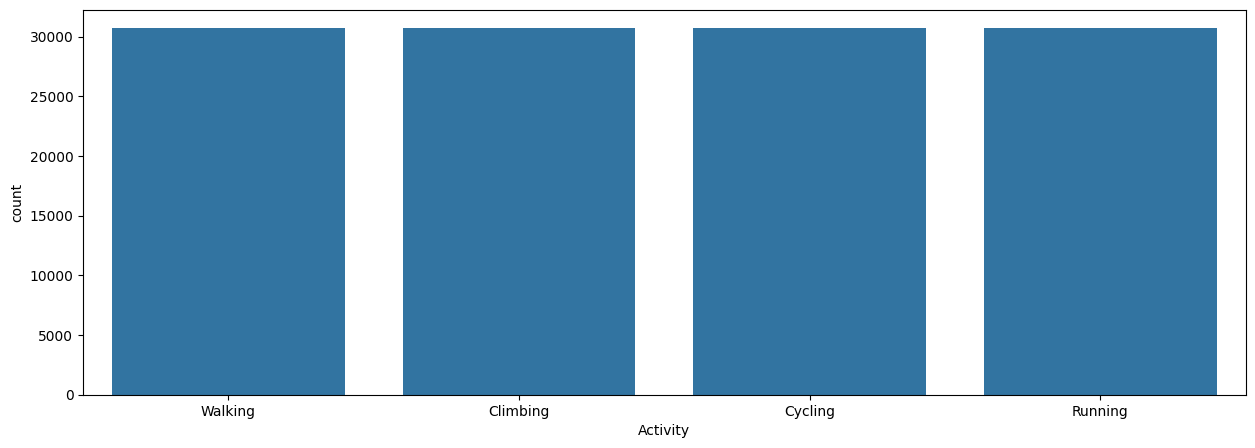

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(x =df['Activity'],data = df,order=df["Activity"].value_counts().index )
plt.xticks(df['Activity'].unique(), activity_names)
plt.show()

In [19]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

## EDA (Exploratory data analysis)

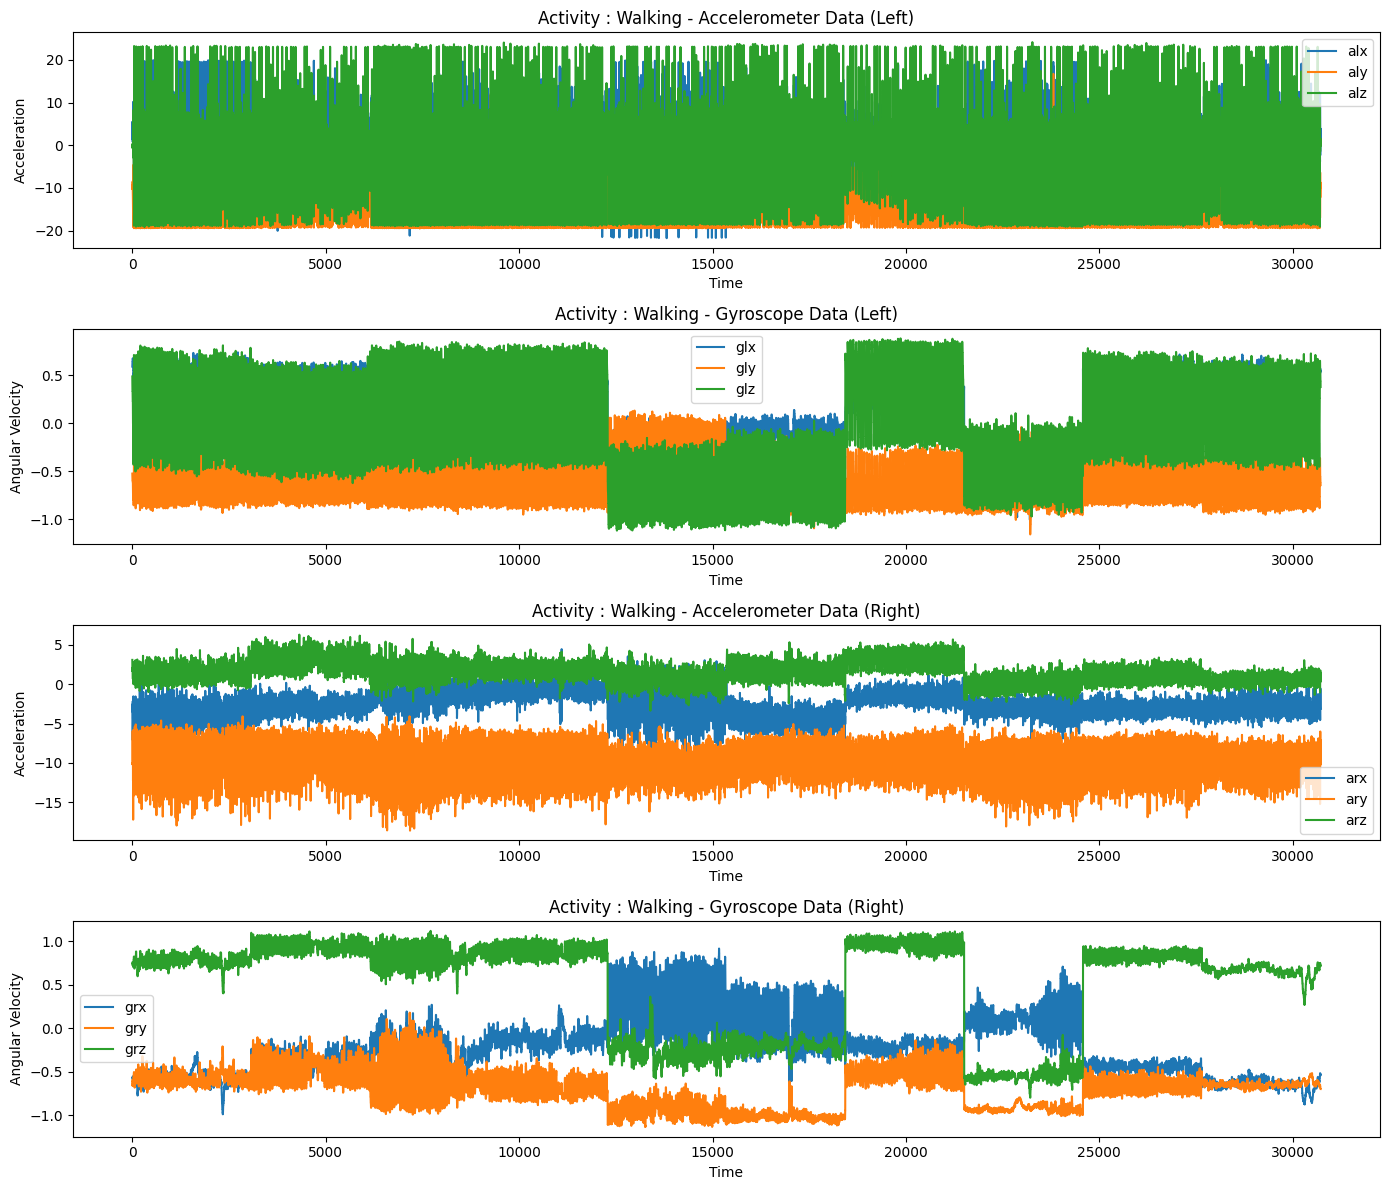

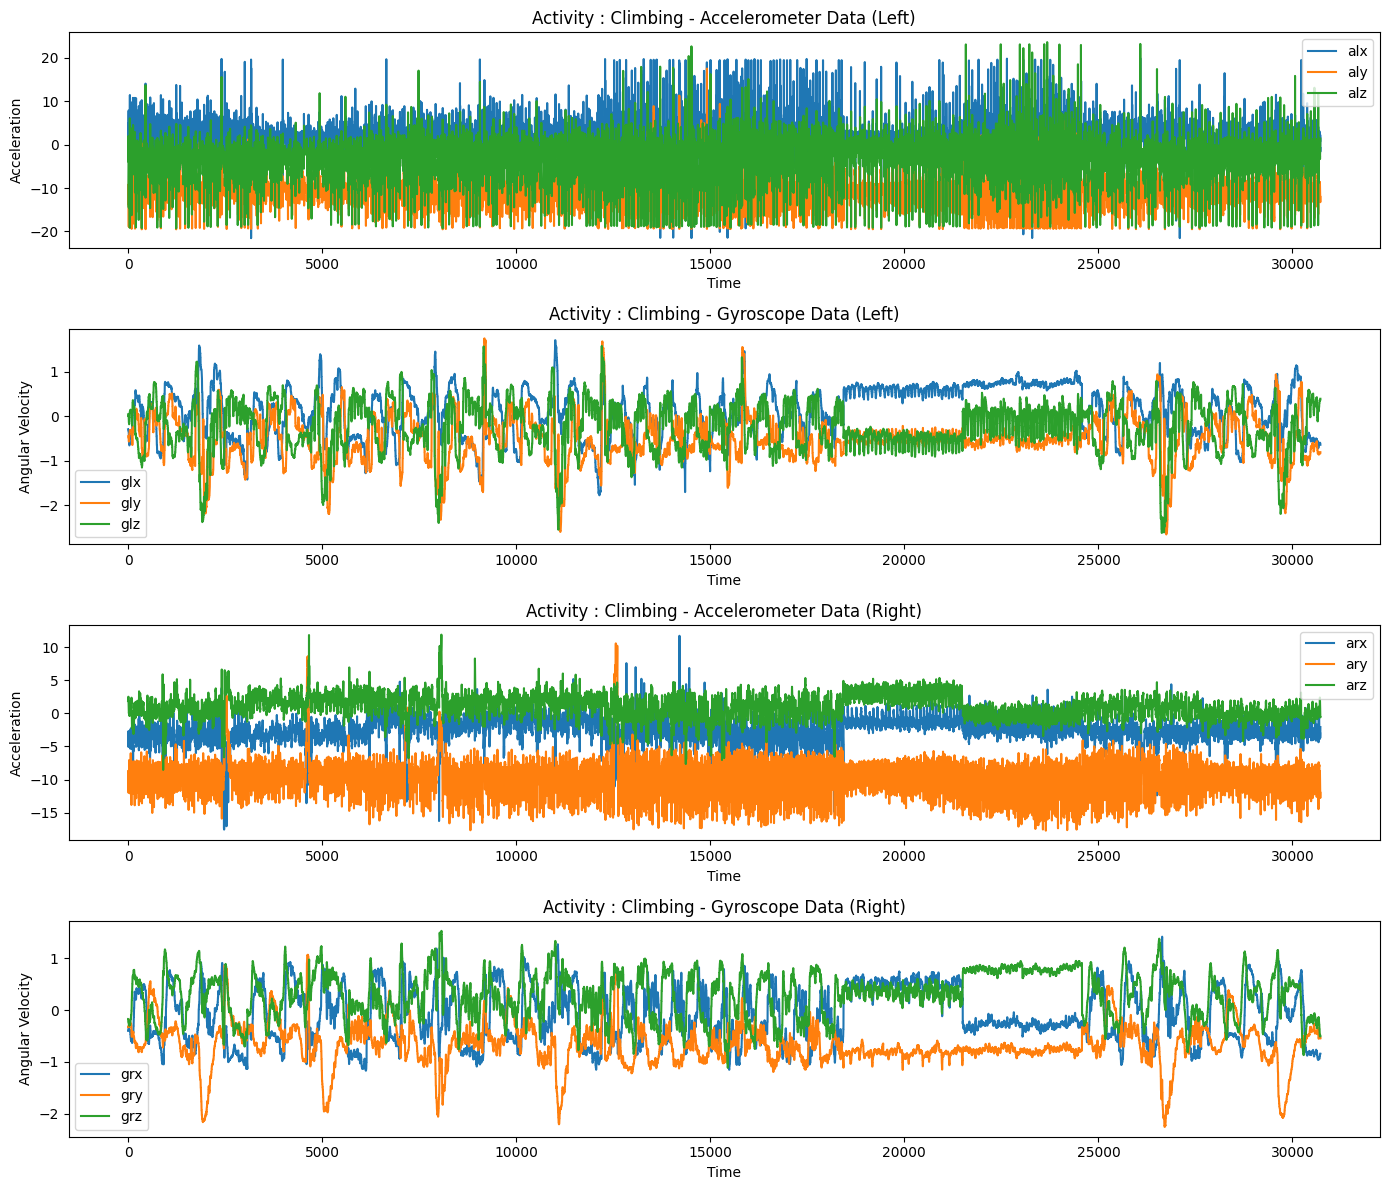

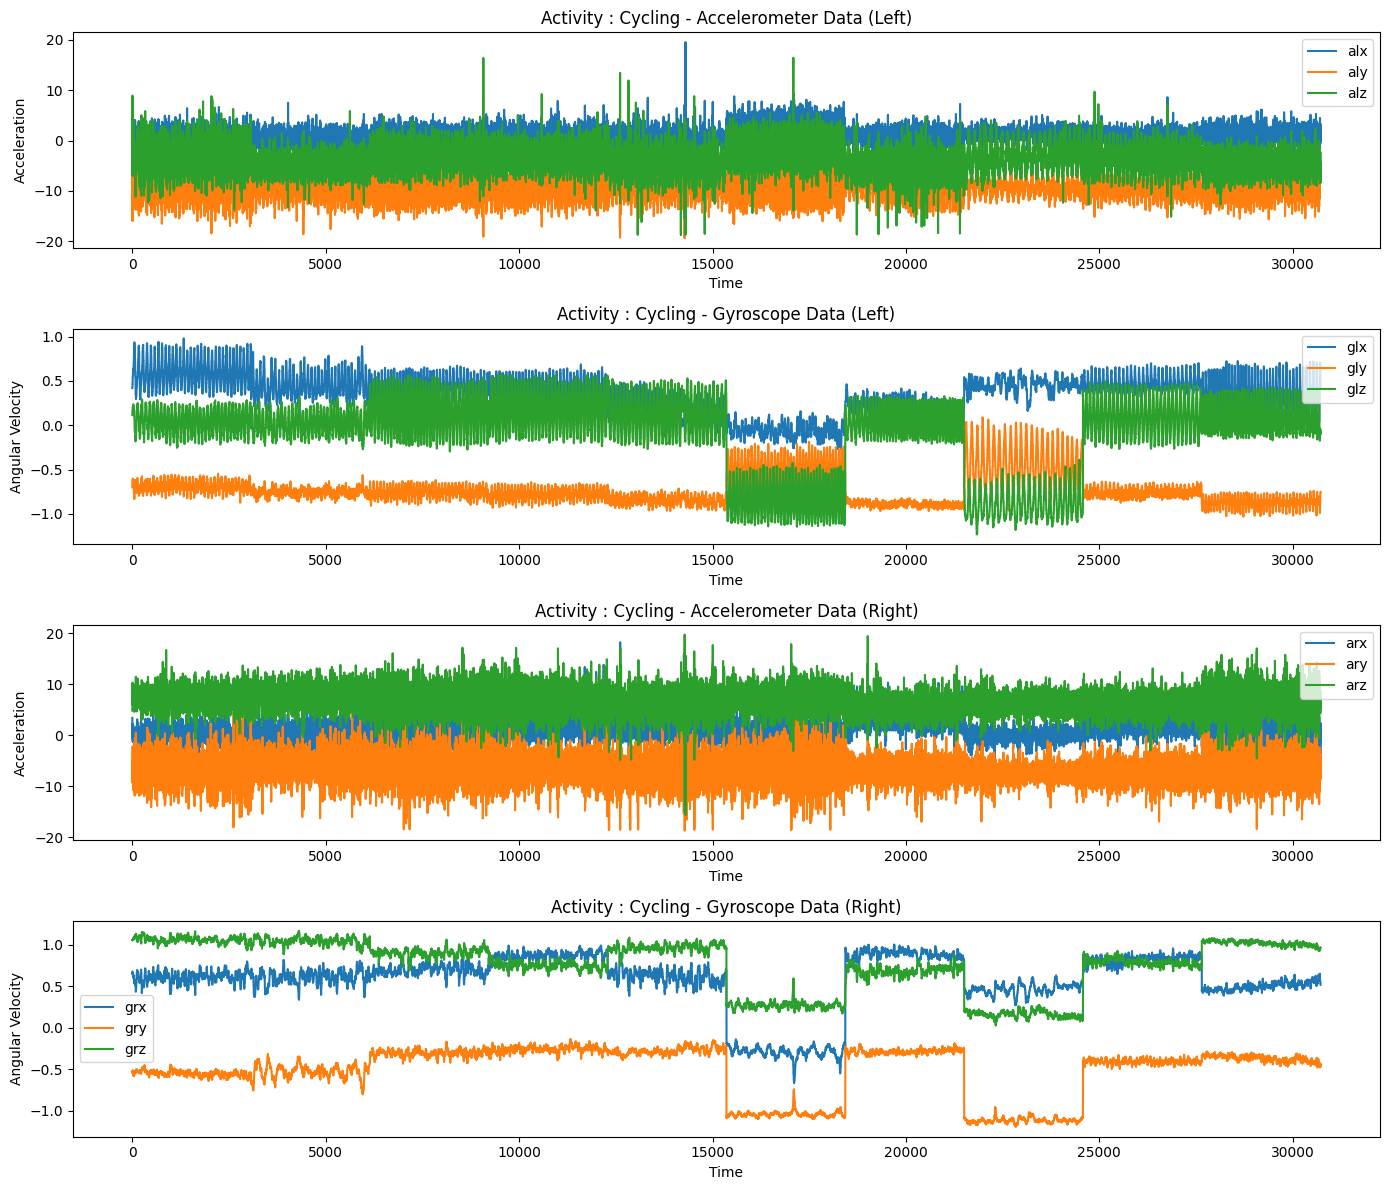

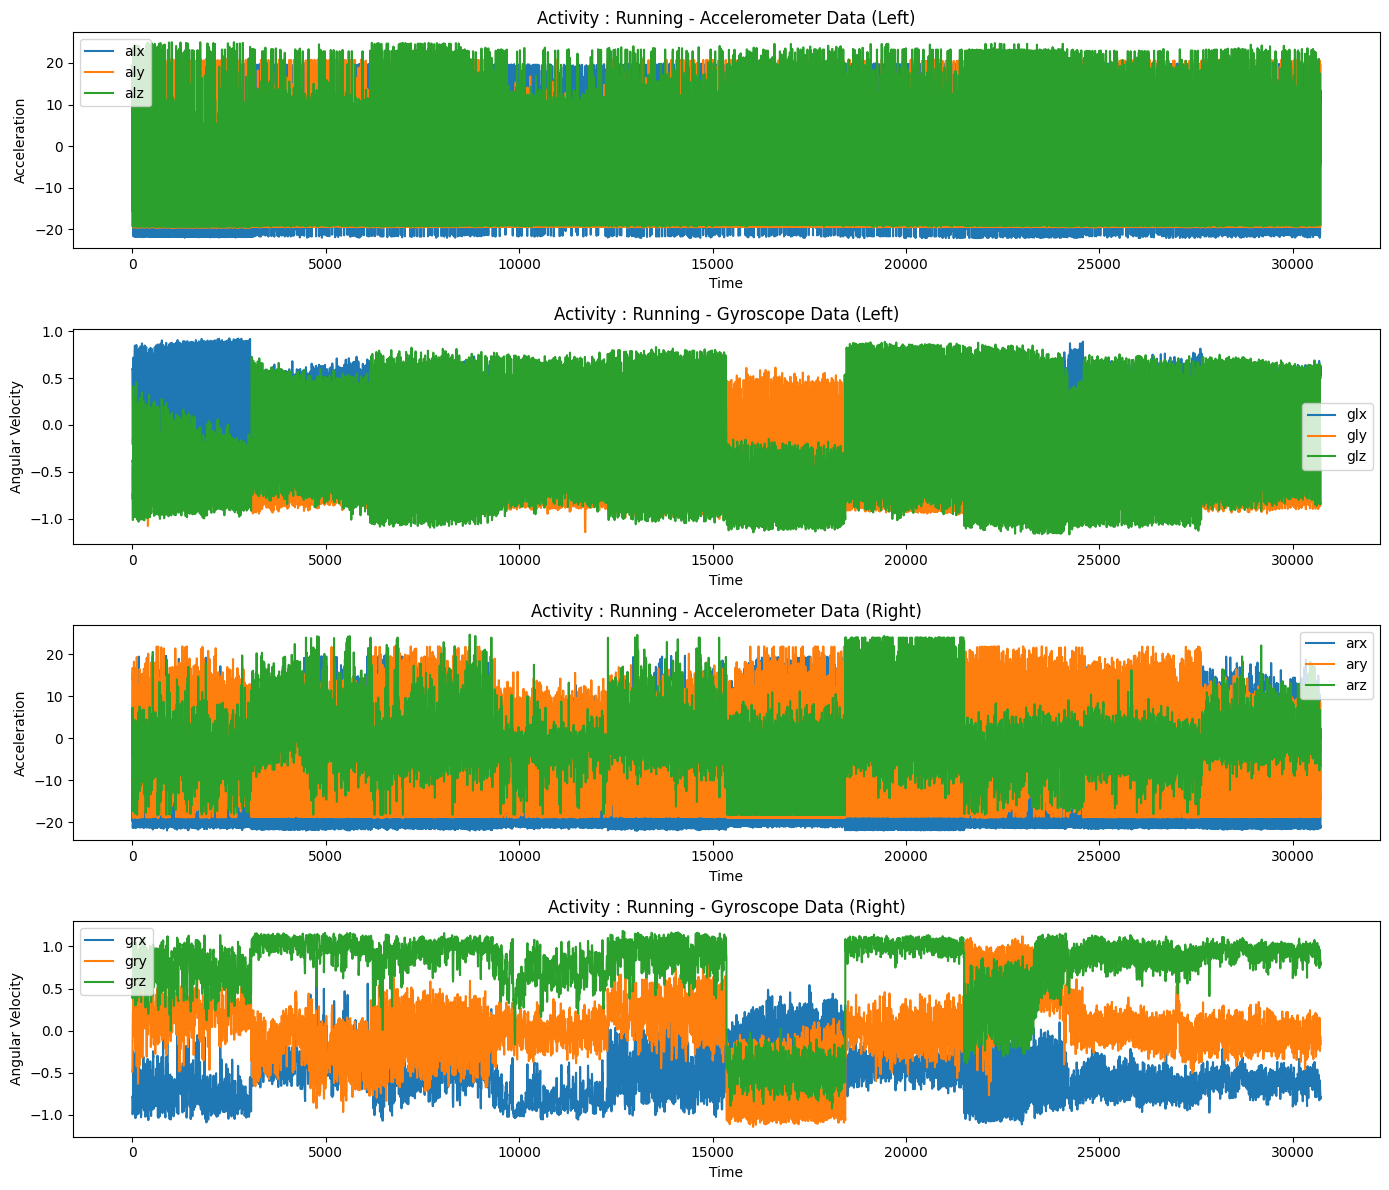

In [20]:
# Define a common x-axis based on the length of the dataset for consistency
time = range(len(df))
activity_names_dict = {0: 'Walking', 1: 'Climbing', 2: 'Cycling', 3: 'Running'}

# Extract unique activities
activities = df['Activity'].unique()

# Plot graphs for each activity with left and right sensors, ensuring same x-axis
for activity in activities:
    activity_data = df[df['Activity'] == activity]

    plt.figure(figsize=(14, 12))

    # Plot left accelerometer data (alx, aly, alz)
    plt.subplot(4, 1, 1)
    plt.plot(time[:len(activity_data)], activity_data['alx'], label='alx')
    plt.plot(time[:len(activity_data)], activity_data['aly'], label='aly')
    plt.plot(time[:len(activity_data)], activity_data['alz'], label='alz')
    plt.title(f'Activity : {activity_names_dict[activity]} - Accelerometer Data (Left)')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.legend()

    # Plot left gyroscope data (glx, gly, glz)
    plt.subplot(4, 1, 2)
    plt.plot(time[:len(activity_data)], activity_data['glx'], label='glx')
    plt.plot(time[:len(activity_data)], activity_data['gly'], label='gly')
    plt.plot(time[:len(activity_data)], activity_data['glz'], label='glz')
    plt.title(f'Activity : {activity_names_dict[activity]} - Gyroscope Data (Left)')
    plt.xlabel('Time')
    plt.ylabel('Angular Velocity')
    plt.legend()

    # Plot right accelerometer data (arx, ary, arz)
    plt.subplot(4, 1, 3)
    plt.plot(time[:len(activity_data)], activity_data['arx'], label='arx')
    plt.plot(time[:len(activity_data)], activity_data['ary'], label='ary')
    plt.plot(time[:len(activity_data)], activity_data['arz'], label='arz')
    plt.title(f'Activity : {activity_names_dict[activity]} - Accelerometer Data (Right)')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.legend()

    # Plot right gyroscope data (grx, gry, grz)
    plt.subplot(4, 1, 4)
    plt.plot(time[:len(activity_data)], activity_data['grx'], label='grx')
    plt.plot(time[:len(activity_data)], activity_data['gry'], label='gry')
    plt.plot(time[:len(activity_data)], activity_data['grz'], label='grz')
    plt.title(f'Activity : {activity_names_dict[activity]} - Gyroscope Data (Right)')
    plt.xlabel('Time')
    plt.ylabel('Angular Velocity')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Correlation Matrix

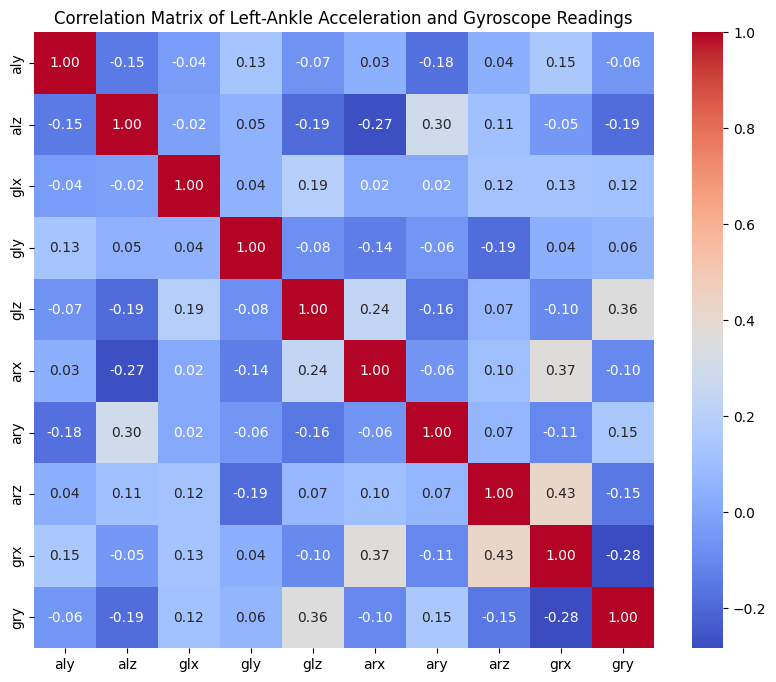

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 1:-2].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Left-Ankle Acceleration and Gyroscope Readings')
plt.show()

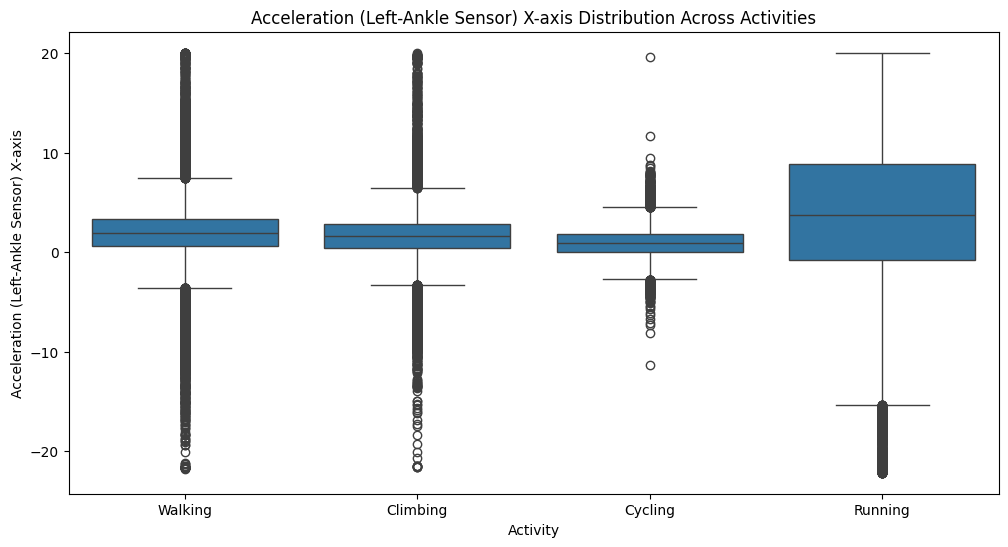

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='alx', data=df)
plt.title('Acceleration (Left-Ankle Sensor) X-axis Distribution Across Activities')
plt.xlabel('Activity')
plt.ylabel('Acceleration (Left-Ankle Sensor) X-axis')
plt.xticks(df['Activity'].unique(), activity_names)
plt.show()

## Modeling

In [23]:
y = df["Activity"]
X = df.drop(columns=["Activity"])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN

In [28]:
# KNN model training
start_time = time.time()
knn_model = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': np.arange(1, 20)}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy') #5 folds cross validation
grid_search_knn.fit(X_train_scaled, y_train)
best_model_knn = grid_search_knn.best_estimator_

y_pred_knn = best_model_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
cm_knn = confusion_matrix(y_test, y_pred_knn)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time for KNN model: {elapsed_time:.2f} seconds")

Elapsed Time for KNN model: 144.27 seconds


In [29]:
best_model_knn

KNeighborsClassifier(n_neighbors=1)

In [30]:
grid_search_knn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

In [31]:
print("K-Nearest Neighbors (KNN) Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")

K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.9986
Precision: 0.9986
Recall: 0.9986
F1-score: 0.9986


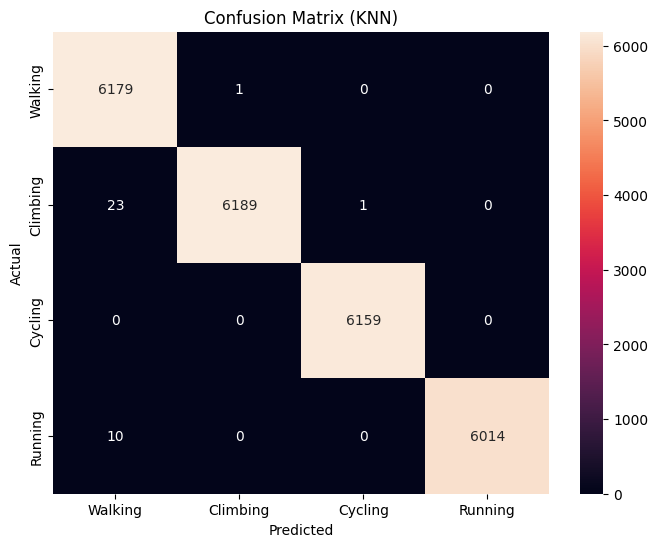

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', yticklabels = activity_names, xticklabels = activity_names)
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

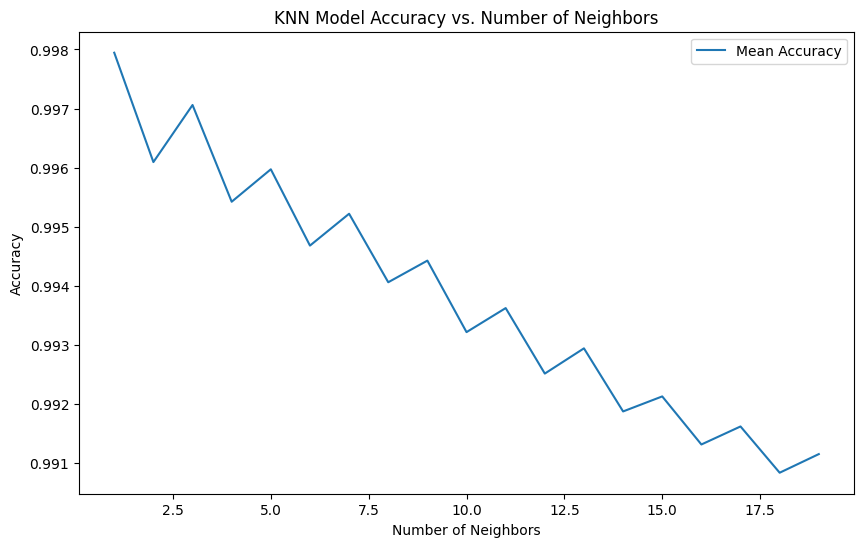

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(param_grid_knn['n_neighbors'], grid_search_knn.cv_results_['mean_test_score'], label='Mean Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

## Logistic Regression

In [46]:
# Logistic regression model training
start_time = time.time()
log_reg_model = LogisticRegression(max_iter=15000)
param_grid_lr = {'C': [0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(log_reg_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
cm_lr = confusion_matrix(y_test, y_pred_lr)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time for Logistc regression model: {elapsed_time:.2f} seconds")

Elapsed Time for Logistc regression model: 8.36 seconds


In [35]:
grid_search_lr

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=15000),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [36]:
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

Logistic Regression Evaluation:
Accuracy: 0.7719
Precision: 0.7726
Recall: 0.7719
F1-score: 0.7720


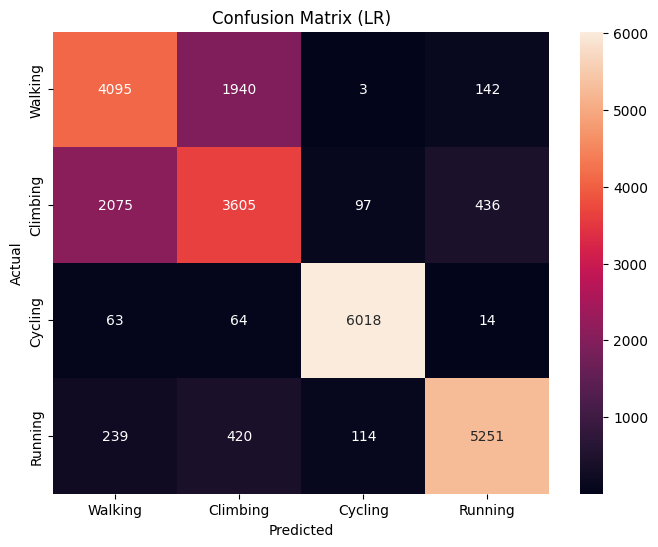

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels = activity_names, yticklabels = activity_names)
plt.title('Confusion Matrix (LR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM

In [52]:
# SVM model training
# start_time = time.time()
# svm_model = SVC()
# param_grid_svm = {'C': [0.1], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']}
# grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
# grid_search_svm.fit(X_train_scaled, y_train)
# best_model_svm = grid_search_svm.best_estimator_
# y_pred_svm = best_model_svm.predict(X_test_scaled)
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
# recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
# f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
# cm_svm = confusion_matrix(y_test, y_pred_svm)
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Elapsed Time for SVM model: {elapsed_time:.2f} seconds")

In [53]:
# grid_search_svm

In [54]:
# print("Support Vector Machine (SVM) Evaluation:")
# print(f"Accuracy: {accuracy_svm:.4f}")
# print(f"Precision: {precision_svm:.4f}")
# print(f"Recall: {recall_svm:.4f}")
# print(f"F1-score: {f1_svm:.4f}")

In [55]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_svm, annot=True, fmt='d', xticklabels = activity_names, yticklabels = activity_names)
# plt.title('Confusion Matrix (SVM)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

## Random Forest Classifier

In [62]:
# Random Forest Classifier
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_rf)
precision_lr = precision_score(y_test, y_pred_rf, average='weighted')
recall_lr = recall_score(y_test, y_pred_rf, average='weighted')
f1_lr = f1_score(y_test, y_pred_rf, average='weighted')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time for Random forest classifier model: {elapsed_time:.2f} seconds")

Elapsed Time for Random forest classifier model: 18.77 seconds


In [63]:
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

Logistic Regression Evaluation:
Accuracy: 0.9989
Precision: 0.9989
Recall: 0.9989
F1-score: 0.9989


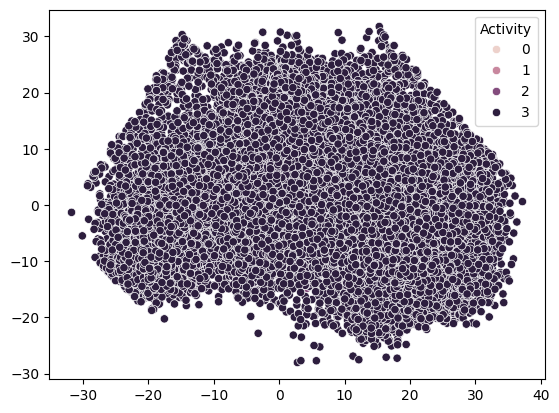

In [71]:
# Dimensionality reduction with PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Activity'])
plt.show()

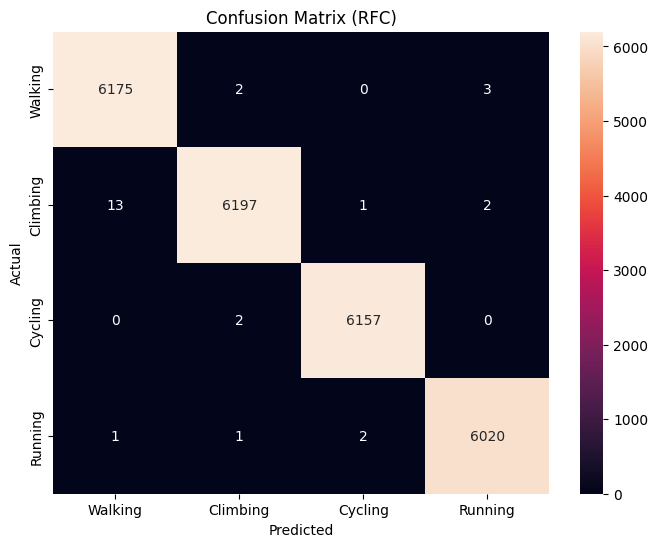

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels = activity_names, yticklabels = activity_names)
plt.title('Confusion Matrix (RFC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LSTM with CNN

In [73]:
import tensorflow as tf
from keras import layers
import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, TimeDistributed

In [74]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,4.3791,-10.2060,0.148050,0.59184,-0.52345,0.48919,-7.0015,-10.0890,3.0789,-0.57647,-0.59959,0.75431,0
1,5.4713,-9.5863,-0.216270,0.62338,-0.55347,0.39489,-6.3209,-10.0260,2.3737,-0.57647,-0.59959,0.75431,0
2,4.1823,-9.5796,-0.530910,0.62338,-0.55347,0.39489,-4.5576,-10.1840,1.6471,-0.56667,-0.65298,0.72629,0
3,1.4208,-9.3857,0.044924,0.62338,-0.55347,0.39489,-3.2267,-9.5227,1.7322,-0.56667,-0.65298,0.72629,0
4,3.1137,-9.6868,-0.359450,0.64007,-0.59475,0.33792,-2.6922,-8.1222,1.7814,-0.56667,-0.65298,0.72629,0


In [76]:
data = df.copy()

# Define the sensor columns
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

# # Normalize the data
scaler = StandardScaler()
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])


In [77]:
# Prepare sequences for LSTM
sequence_length = 100
X, y = [], []

for i in range(len(data) - sequence_length):
    X.append(data[sensor_columns].iloc[i:i + sequence_length].values)
    y.append(data['Activity'].iloc[i + sequence_length])

X = np.array(X)
y = np.array(y)

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)


In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train.shape

(98224, 100, 12)

In [80]:
X_test.shape

(24556, 100, 12)

In [81]:
y_train.shape

(98224, 4)

In [82]:
y_test.shape

(24556, 4)

In [96]:
# Define the CNN-LSTM model
def create_cnn_lstm_model(input_shape):
    model = Sequential()

    # CNN part
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    # Reshape for LSTM
    model.add(TimeDistributed(Flatten()))

    # LSTM part
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))

    # Dense layers
    model.add(Dense(50, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
input_shape = (sequence_length, len(sensor_columns))
model = create_cnn_lstm_model(input_shape)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 98, 64)         │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 47, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 23, 128)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 23, 100)        │        91,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 23, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,326 (798.15 KB)

 Trainable params: 204,326 (798.15 KB)

 Non-trainable params: 0 (0.00 B)

None


In [98]:
start_time = time.time()
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed Time for CNN+LSTM model: {elapsed_time:.2f} seconds")

Epoch 1/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.9741 - loss: 0.0713 - val_accuracy: 0.9994 - val_loss: 0.0040
Epoch 2/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 3/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 4/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 5/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.9999 - loss: 9.2886e-04 - val_accuracy: 0.9998 - val_loss: 9.6394e-04
Epoch 6/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 7/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 8/10
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 58s 38ms/step - accuracy: 

In [99]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

768/768 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9999 - loss: 5.8127e-04
Test Accuracy: 0.9999


In [100]:
# Save the trained model
model.save('cnn_lstm_model_4_activities.h5')

# Testing with sample data

In [101]:
test = pd.read_csv('Running.csv')

In [102]:
test = test.values.reshape(1,100,12)

In [103]:
test.shape

(1, 100, 12)

In [104]:
result = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [105]:
activity_names[np.argmax(result, axis=1)[0]]

'Running'